In [1]:
from qiskit import QuantumCircuit, QuantumRegister

In [5]:
def draw(qc, measure=True, state_vector=False, bloch_sphere=False):
    display(qc.draw(output='mpl'))
    if(not measure or not state_vector and not bloch_sphere): return

    # Measure
    usim = Aer.get_backend('aer_simulator')
    qc.save_statevector()
    qobj = assemble(qc)
    final_state = usim.run(qobj).result().get_statevector()
    
    # Print State Vector
    if(measure and state_vector):
        display(array_to_latex(final_state, prefix="\\text{Statevector = }"))
    
    # Print Bloch Sphere of the inputs
    if(measure and bloch_sphere):
        display(plot_bloch_multivector(final_state))

In [3]:
input_bit = QuantumRegister(1, 'input')
output_bit = QuantumRegister(1, 'output')
garbage_bit = QuantumRegister(1, 'garbage')


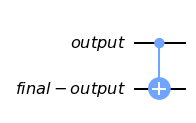

In [6]:
final_output_bit = QuantumRegister(1, 'final-output')

copy = QuantumCircuit(output_bit, final_output_bit)
copy.cx(output_bit, final_output_bit)

draw(copy)

The above circuit copies `output` to `final - output`, so that there is no extraneous entangling with garbage.